# Evaluate Model

In [2]:
import keras

/Users/nathaniel/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/nathaniel/miniconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
model = keras.models.load_model('epochs_200_datav2_densev2_try1_2018-09-13_23-16-16_weights.chkpt.hdf5')

In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           main_input[0][0]                 
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [5]:
import cv2
from matplotlib import pyplot as plt

In [18]:
img = cv2.imread('../data/test/13_BK137-ptcanvas-sqtrim-resizeBW224.jpg')
img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)

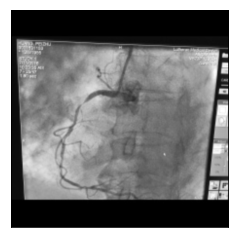

In [19]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [20]:
import numpy as np
img_np = np.array(img)
img_np = img_np/255

img_np = np.expand_dims(img_np, axis=0)

In [21]:
prediction = model.predict([img_np], verbose=1)

1/1 [==============================] - 0s 245ms/step


In [22]:
print(np.argmax(prediction[1]))
print(np.max(prediction[1]))

3
0.89940757


In [23]:
print(prediction[0])

[[0.89814925]]


In [ ]:
model.save_weights('CathNetv2_weights.h5')
with open('CathNetv2_architecture.json', 'w') as f:
    f.write(model.to_json())